## Ensemble Learning

The idea of ensemble learning is to build a prediction model by combining the strenths of a collection of simpler base models. A collection of base models is called an ensemble, and ensemble learning algorithm is called an ensemble method.

Most common ensemble methods are voting, bagging, boosting, and stacking. In this post, I will go over the voting method for classification.

### Voting
This is the most simple ensemble method. The basic idea is that we predict the class that gets the most votes, which is called a hard voting, after training diverse classifiers. 
If each base model can estimate probabiliy, we can predict the class with the highest class probability, averaged over all the individual base models. This is called a soft voting and it often produces a better result than a hard voting.

Symbolically, suppose $f_{i}$ represents a predictor $i = 1, ..., n$ and each predictor is different from each other. Then the hard voting classifer, $f$, classifies data $x$,

$$f(x) = mode(\{f_{i}(x)\}_{i = 1}^{n}).$$

Also, for regression, the voting regressor takes the average over all predictors which is

$$f(x) = \frac{1}{n}\sum_{i = 1}^{n}f_{i}(x).$$

I will illustrate the voting method using a generated data.

In [1]:
import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
# To plot pretty figures
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

import seaborn as sns

from sklearn.datasets import make_blobs

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'mlxtend'

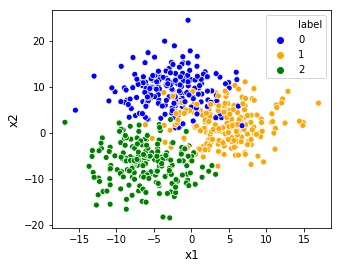

In [2]:
# scatter plot, dots colored by class value
X, y = make_blobs(n_samples=600, centers=3, n_features=2, cluster_std = 4, random_state = 42)
data = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
color_dict = dict({0: "blue", 1: "orange", 2:'green'})
plt.figure(figsize=(5,4))
sns.scatterplot(x="x1", y="x2", hue="label", data=data, palette=color_dict)
#sns.lmplot(data=data, x='x1', y='x2', hue='label', fit_reg=False, legend=True, legend_out=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
data_train = pd.DataFrame(dict(x1=X_train[:,0], x2=X_train[:,1], label=y_train))
data_test = pd.DataFrame(dict(x1=X_test[:,0], x2=X_test[:,1], label=y_test))
#f, axes = plt.subplots(1, 2)

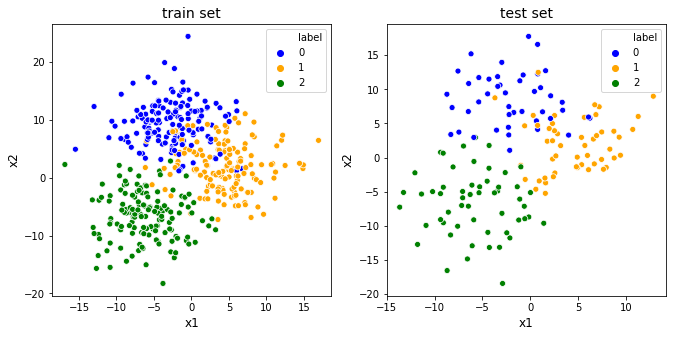

In [8]:
plt.figure(figsize=(11,5))
plt.subplot(121)
sns.scatterplot(x="x1", y="x2", hue="label", data=data_train, palette=color_dict)
plt.title("train set", fontsize=14)
plt.subplot(122)
sns.scatterplot(x="x1", y="x2", hue="label", data=data_test, palette=color_dict)
plt.title("test set", fontsize=14)
plt.show()

In [ ]:
# Initiate different types of classifiers
log_clf = LogisticRegression(random_state=42)
des_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(gamma = 'scale', probability = True, random_state=42)
knn_clf = KNeighborsClassifier()
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

clf_label_list = [('lr', log_clf), ('dt', des_clf), ('svc', svm_clf), ('knn', knn_clf), ('rnd', rnd_clf)]
voting_hrd_clf = VotingClassifier(estimators = clf_label_list, voting = 'hard')
voting_sft_clf = VotingClassifier(estimators = clf_label_list, voting = 'soft')

In [ ]:
clf_list = [log_clf, des_clf, svm_clf, knn_clf, rnd_clf, voting_hrd_clf]
label_list = ['Logistic Regression', 'Decision Tree', 'SVC', 'k-NN', 'Random Forest', 'Hard voting']

In [ ]:
# Function for plotting decision boundaries of multiple classifiers
def decision_regions(clf_list, label_list, X, y, numRows, numCols, figSize):
  fig = plt.figure(figsize = figSize)
  gs = gridspec.GridSpec(numRows, numCols)
  axs = []
  tot_num = numRows * numCols + 1
  for clf, label, num in zip(clf_list, label_list, range(1, tot_num)):
    scores = cross_val_score(clf, X, y, cv= 3, scoring='accuracy')
    print("Accuracy: {:.4f}, std: {:.4f} [{}]".format(scores.mean(), scores.std(), label))
    
    clf.fit(X, y)
    axs.append(fig.add_subplot(gs[num - 1]))
    axs[-1] = plot_decision_regions(X = X, y = y, clf = clf, legend = 1)
    plt.title(label)
    
  plt.show()

Accuracy: 0.9000, std: 0.0060 [Hard voting]
Accuracy: 0.9022, std: 0.0126 [Soft voting]


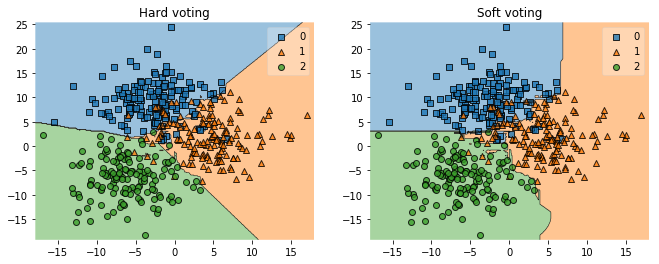

In [18]:
# Comparing the hard voting classifier and the soft voting classifier 
decision_regions([voting_hrd_clf, voting_sft_clf], ['Hard voting', 'Soft voting'], X_train, y_train, 1, 2, (11,4))

Accuracy: 0.8999, std: 0.0149 [Logistic Regression]
Accuracy: 0.8689, std: 0.0086 [Decision Tree]
Accuracy: 0.9088, std: 0.0224 [SVC]
Accuracy: 0.8955, std: 0.0179 [k-NN]
Accuracy: 0.8821, std: 0.0143 [Random Forest]
Accuracy: 0.9000, std: 0.0060 [Hard voting]


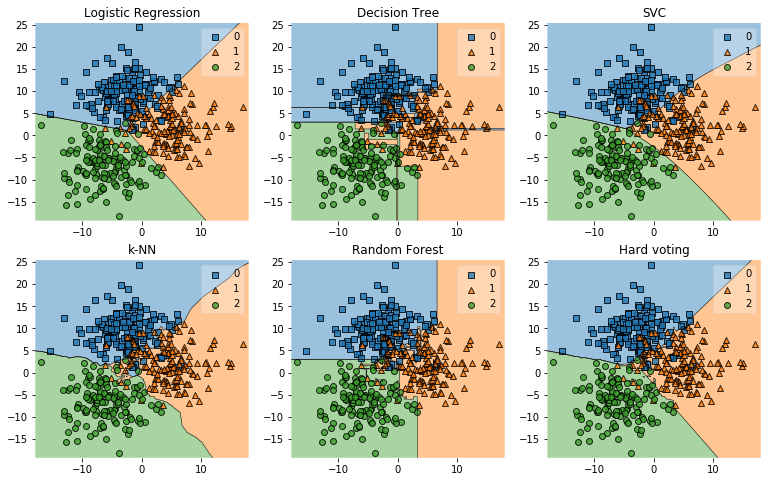

In [19]:
decision_regions(clf_list, label_list, X_train, y_train, 2, 3, (13,8))

It seems the support vector classifier outperforms the voting classifier on the train set. Let's check on the test set.

In [22]:
from sklearn.metrics import accuracy_score

clf_all_list = [log_clf, des_clf, svm_clf, knn_clf, rnd_clf, voting_hrd_clf, voting_hrd_clf]
label_all_list = ['Logistic Regression', 'Decision Tree', 'SVC', 'k-NN', 'Random Forest', 'Hard voting', 'Soft voting']

for clf, label in zip(clf_all_list, label_all_list):
  clf.fit(X_train, y_train)
  print("Accuracy of {}: {:.4f}".format(label, accuracy_score(clf.predict(X_test), y_test)))

Accuracy of Logistic Regression: 0.8867
Accuracy of Decision Tree: 0.8733
Accuracy of SVC: 0.8733
Accuracy of k-NN: 0.8733
Accuracy of Random Forest: 0.8867
Accuracy of Hard voting: 0.8933
Accuracy of Soft voting: 0.8933


As we can see, the support vector classifier is badly overfitting and the soft voting classifier outperforms all as expected.

### Why does voting method work?
This is roughly because of the law of large numbers. Suppose we have 1000 base classifiers that are individually correct only 51% of the time. If we represent this with a random variable, for each classifier $f_i$, we have $X_i = 1$ with 51% and $X_i = 0$ with 49%, where 1 indicates that this classifier is correct. Assuming that each classifier is independent, the probability of getting majority of right classifiers is that 

In [4]:
from scipy.stats import binom
1 - binom.cdf(500, 1000, 0.51)

0.7260985557303354

The probability of getting majority of right classifiers will increase as we take more number of base classifiers. However, this is only true when all classifiers are independent and this is clearly not the case since they are all trained on the same data. To make this reasoning work better, we should make them more independent. One way to do it when we train them on the same data is to use a very different algorithm for each classifier. This will increase the chance that they will make different types of errors which lead to the improvement of the ensemble's accurary.